In [202]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()
# Combine the data into a single dataset

merged_data = pd.merge(city_data, ride_data, on="city", how="outer")

#Data Details to note anything that might be off or have bad values
merged_data.describe(include="all")


,city,driver_count,type,date,fare,ride_id
count,2375,2375.000000,2375,2375,2375.000000,2.375000e+03
unique,120,NaN,3,2375,NaN,NaN
top,West Angela,NaN,Urban,2018-02-08 23:33:35,NaN,NaN
freq,39,NaN,1625,1,NaN,NaN
mean,NaN,28.930105,NaN,NaN,26.753112,4.887270e+12
std,NaN,20.666306,NaN,NaN,12.109465,2.907361e+12
min,NaN,1.000000,NaN,NaN,4.050000,3.218337e+08
25%,NaN,11.000000,NaN,NaN,17.190000,2.381175e+12
50%,NaN,23.000000,NaN,NaN,26.600000,4.748541e+12
75%,NaN,45.000000,NaN,NaN,36.645000,7.461936e+12


In [203]:
#verify that the the columns are the right data type
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
driver_count    2375 non-null int64
type            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [204]:
# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [205]:
#urban new method, create a dataframe from the merged data filtered by type = "Urban"
urban = merged_data[merged_data["type"] == "Urban"]

#create a new dataframe that takes urban df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
urban_cities = pd.DataFrame({"Avg Fare":urban.groupby("city")["fare"].mean(), 
                          "Total Rides": urban.groupby("city")["ride_id"].count(),
                         "Total Drivers": urban.groupby("city")["driver_count"].mean()})
#Test Urban Df
urban_cities.head()

#Rural Cities filter, create a dataframe from the merged data filtered by type = "Rural"
rural = merged_data[merged_data["type"] == "Rural"]

#create a new dataframe that takes rural df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
rural_cities = pd.DataFrame({"Avg Fare":rural.groupby("city")["fare"].mean(), 
                          "Total Rides": rural.groupby("city")["ride_id"].count(),
                         "Total Drivers": rural.groupby("city")["driver_count"].mean()})
#Test Rural Df
rural_cities.head()
#Suburban Cities, create a dataframe from the merged data filtered by type = "Suburban"

suburban = merged_data[merged_data["type"] == "Suburban"]

#create a new dataframe that takes suburban df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
suburban_cities = pd.DataFrame({"Avg Fare":suburban.groupby("city")["fare"].mean(), 
                          "Total Rides": suburban.groupby("city")["ride_id"].count(),
                         "Total Drivers": suburban.groupby("city")["driver_count"].mean()})
#Test Suburban df
suburban_cities.head()

#city_data.head()


,Avg Fare,Total Rides,Total Drivers
city,,,
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Brandonfort,35.437368,19,10
Colemanland,30.894545,22,23
Davidfurt,31.995882,17,23


TypeError: 'bool' object is not callable

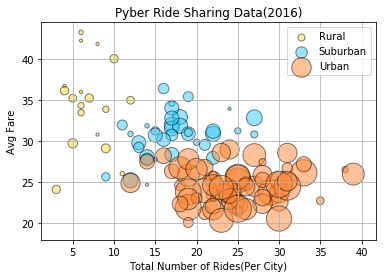

In [208]:
# Build the scatter plots for each city types
# To plot multiple column groups in a single axes, repeat plot method specifying target ax
# Looked up HTML color codes
ax = rural_cities.plot.scatter(x="Total Rides", y='Avg Fare', s= rural_cities["Total Drivers"]*10, grid=True, 
                               alpha=0.5, color='#FFD633', edgecolors ='black', label='Rural', figsize= [6,4])
plt.plot()

#Add suburban cities df to existing df, matching ax. 
#Talk to instructors for the need to reset the index and how ax works. 
suburban_cities.reset_index().plot.scatter(x="Total Rides", y='Avg Fare', s= suburban_cities["Total Drivers"]*10, color='#33CCFF', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Suburban', ax=ax)
#Repeat above process
urban_cities.reset_index().plot.scatter(x="Total Rides", y='Avg Fare', s= urban_cities["Total Drivers"]*10, color='#FF8633', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Urban', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

#legend was added automatically, but due to the markers being effected by size, found the below code to make sure all markers in
#legend are matching
lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(0.92,.5,"Note:")
plt.figtext(0.92,.45,"Circle count correlates with driver count per city.")

#need to save figure
plt.savefig("../Images/Pyber Ride Sharing Bubble Plot.png")
plt.show()

In [ ]:
#create new dataframe that groups our merged data by city type
#city_group = pd.DataFrame(merged_data.groupby(["city"]).fare.mean())
#city_group
#city_group = city_group.rename(columns= {"fare": "Avg Fare"})
#city_group["Total Rides"] = merged_data.groupby(["city"]).ride_id.count()
#city_group.head()
#driver_count = merged_data.groupby("city").driver_count.unique()
#print(driver_count)
#city_group["Driver Count"] = driver_count
#city_group.head()
#city_group["Type"] = merged_data.groupby(["city"]).type.unique()
#city_group["Driver Count"] = merged_data.groupby(["city"]).driver_count.unique()
#city_group.head()
#city_group.head()
#city_group.loc["Richardfort"]


In [ ]:
# create your label list
#check the x max and mins for total rides
#x_max = city_group["Total Rides"].max()
#x_min = city_group["Total Rides"].min()
#print(x_max)
#print(x_min)

# Obtain the x and y coordinates for each of the three city types
#x_axis = np.arange(0, 45, 5)
#x_axis
#2nd option
#total_rides = city_group["Total Rides"]

#average_fare = city_group["Avg Fare"]
#average_fare

#print(average_fare)
#print(x_axis)
# Build the scatter plots for each city types

#city_group.plot(kind="scatter", x= "Total Rides" , y= "Avg Fare", s="Driver Count", grid=True, figsize=(6,4), title="Pyber Ride Sharing Data(2016)")
#plt.show()
# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
#plt.show()

## Total Fares by City Type

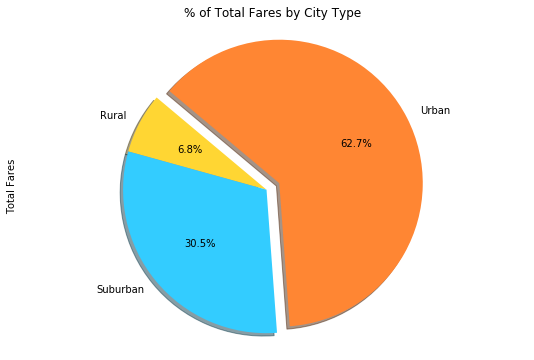

In [209]:
# Calculate Type Percents
#create new dataframe from original merged_data, by grouping by type, and creating a column that counts the "fare" column values
total_fares_types = merged_data.groupby(["type"])[["fare"]].sum()

#rename column, created a percent of total just as a double check to our work. Not necessary
total_fares_types = total_fares_types.rename(columns={"fare": "Total Fares"})
total_fares_types["Percent of Total"] = round((total_fares_types["Total Fares"]/total_fares_types["Total Fares"].sum())*100,2)
total_fares_types["Total Rides"] = merged_data.groupby("type").ride_id.count()
total_fares_types.head()

# Explode list creates separation for the urban data, and colors list is the same colors from our bubble chart
explode = [0,0,0.1]
colors = ['#FFD633','#33CCFF','#FF8633']

#Create new pie chart
total_fares_types.plot.pie(y="Total Fares",autopct="%1.1f%%",colors=colors, title= "% of Total Fares by City Type", legend=False
                           , startangle=140, explode=explode, figsize=[9,6], shadow=True)
#ensures we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Percent_By_City_Type.png")

plt.show()


## Total Rides by City Type

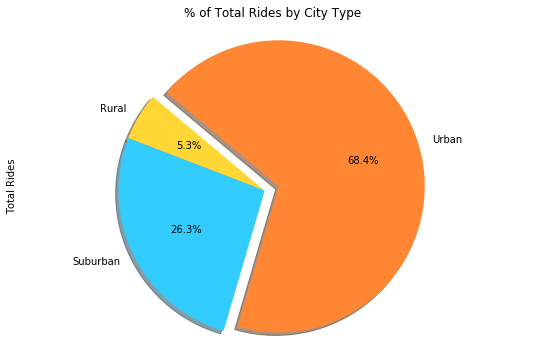

In [210]:
# Calculate Ride Percents
total_fares_types.head()
# Build Pie Chart
total_fares_types.plot.pie(y="Total Rides",autopct="%1.1f%%",colors=colors, title= "% of Total Rides by City Type", legend=False
                           , startangle=140, explode=explode, figsize=[9,6], shadow=True)
#ensures we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Percent of Total Rides by City Type.png")


In [211]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()